In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 

💡 **Insight:** Visualization step — reveals underlying patterns, relationships, or anomalies in the dataset.

In [3]:
data = pd.read_csv("meesho Orders Aug.csv")
data.head()

,Reason for Credit Entry,Sub Order No,Order Date,Customer State,Product Name,SKU,Size,Quantity,Supplier Listed Price (Incl. GST + Commission),Supplier Discounted Price (Incl GST and Commision)
0,DELIVERED,406826346276_1,2022-08-01,Rajasthan,FIVESTAR Georgette Lehengha Choli with Inner C...,6326,Semi Stitched,1,1910.0,1910.0
1,CANCELLED,216649987717_1,2022-08-02,Andhra Pradesh,Beautiful pure lakhnovi long kurta embroidery ...,Kb 201,XXL,1,1500.0,1500.0
2,DELIVERED,184970118893_1,2022-08-02,Karnataka,PARTY WEAR BEAUTIFUL LOOK FANCY EMBROIDERY AN...,hk 1446,Free Size,1,1561.0,1561.0
3,RTO_COMPLETE,916538974169_1,2022-08-02,Assam,FIVESTAR Designer Suit On Havy Gorgette febric...,1101 black,Semi Stitched,1,1749.0,1749.0
4,DELIVERED,528661643961_1,2022-08-02,West Bengal,stlish dress,mk -6114,XL,1,750.0,750.0


🧹 **Data Preprocessing **🔄

💡 **Insight:** Unnecessary columns removed to simplify the dataset and focus on relevant business features.

In [4]:
data.drop(["Supplier Listed Price (Incl. GST + Commission)"],inplace=True,axis=1)


💡 **Insight:** Renaming columns for better readability helps maintain consistent naming during EDA.

In [5]:
data.columns = ["status","id","date","state","name","sku","size","quantity","price"]
data.head()

,status,id,date,state,name,sku,size,quantity,price
0,DELIVERED,406826346276_1,2022-08-01,Rajasthan,FIVESTAR Georgette Lehengha Choli with Inner C...,6326,Semi Stitched,1,1910.0
1,CANCELLED,216649987717_1,2022-08-02,Andhra Pradesh,Beautiful pure lakhnovi long kurta embroidery ...,Kb 201,XXL,1,1500.0
2,DELIVERED,184970118893_1,2022-08-02,Karnataka,PARTY WEAR BEAUTIFUL LOOK FANCY EMBROIDERY AN...,hk 1446,Free Size,1,1561.0
3,RTO_COMPLETE,916538974169_1,2022-08-02,Assam,FIVESTAR Designer Suit On Havy Gorgette febric...,1101 black,Semi Stitched,1,1749.0
4,DELIVERED,528661643961_1,2022-08-02,West Bengal,stlish dress,mk -6114,XL,1,750.0


🔍**Performed EDA**

💡 **Insight:** This helps identify data types and missing values, indicating where cleaning or conversion is needed.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   status    208 non-null    object 
 1   id        208 non-null    object 
 2   date      208 non-null    object 
 3   state     208 non-null    object 
 4   name      208 non-null    object 
 5   sku       208 non-null    object 
 6   size      208 non-null    object 
 7   quantity  208 non-null    int64  
 8   price     208 non-null    float64
dtypes: float64(1), int64(1), object(7)
memory usage: 14.8+ KB


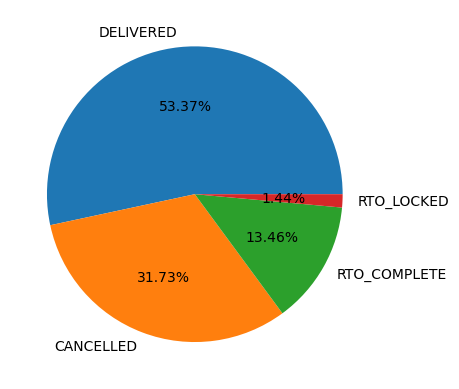

In [7]:
plt.pie(data["status"].value_counts(),autopct="%0.2f%%",labels=data["status"].unique(),radius=1,)
plt.show()


💡 **Insight:** Visualizes the proportion of different order statuses (Delivered, Cancelled, Returned), offering quick insight into operational performance.

<Axes: xlabel='size', ylabel='price'>

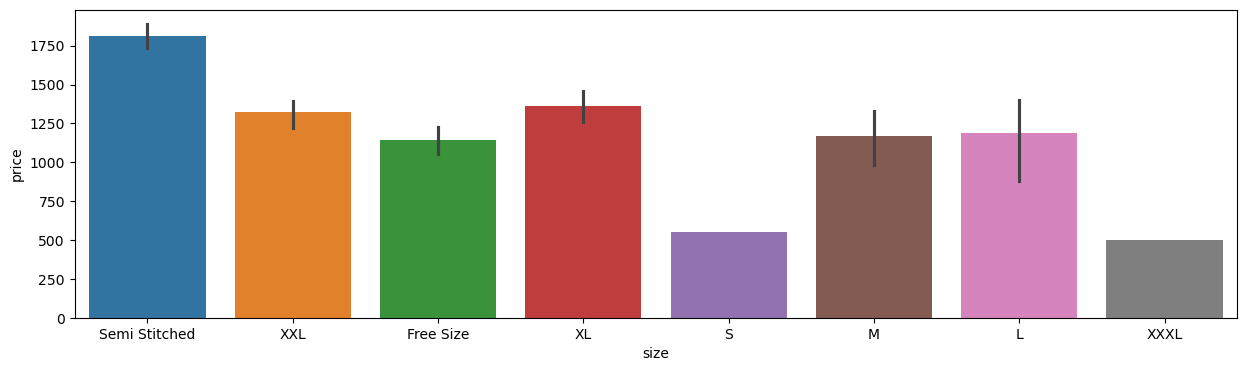

In [8]:
plt.figure(figsize=(15,4))
sns.barplot(data=data,x="size",hue="size",y="price")

#Semi Stitched Product Price is High

<Axes: ylabel='price'>

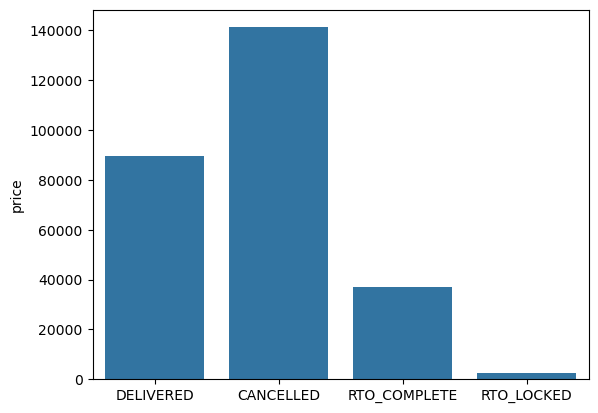

In [10]:
sns.barplot(y = data.groupby("status")["price"].sum(),x=data.status.unique())

<Axes: xlabel='price', ylabel='Count'>

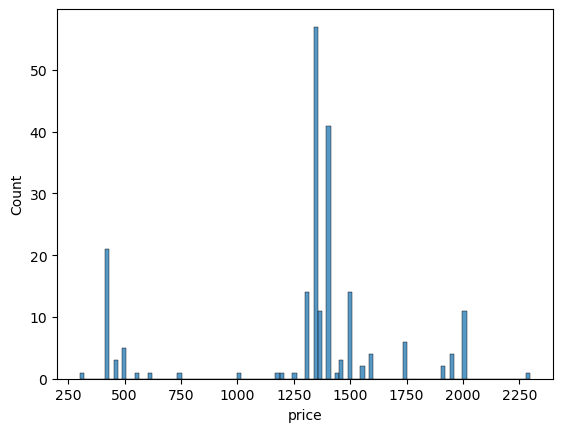

In [11]:
sns.histplot(data["price"])

#seller sale product range 250-2300

#most of product range 1200-1500

In [12]:
rto = pd.DataFrame(data[data["status"]=="RTO_COMPLETE"])
rto.head()

,status,id,date,state,name,sku,size,quantity,price
3,RTO_COMPLETE,916538974169_1,2022-08-02,Assam,FIVESTAR Designer Suit On Havy Gorgette febric...,1101 black,Semi Stitched,1,1749.0
5,RTO_COMPLETE,261363877240_1,2022-08-02,Uttar Pradesh,Heavy faux georgette with embroidery work with...,Ad 009 a,XXL,1,1500.0
9,RTO_COMPLETE,183404359462_1,2022-08-03,Bihar,top & bottom set,akshar 1090,M,1,1368.0
12,RTO_COMPLETE,493966375185_1,2022-08-04,Odisha,PARTY WEAR LOOK HEAVY EMBROIDERY AND 5mm SEQU...,Hk1408b,Free Size,1,1350.0
37,RTO_COMPLETE,545646779706_1,2022-08-08,Andhra Pradesh,PARTY WEAR LOOK HEAVY EMBROIDERY AND 5mm SEQU...,Hk1408b,Free Size,1,1350.0


In [13]:
rto.shape

(28, 9)

#28 Product had Return

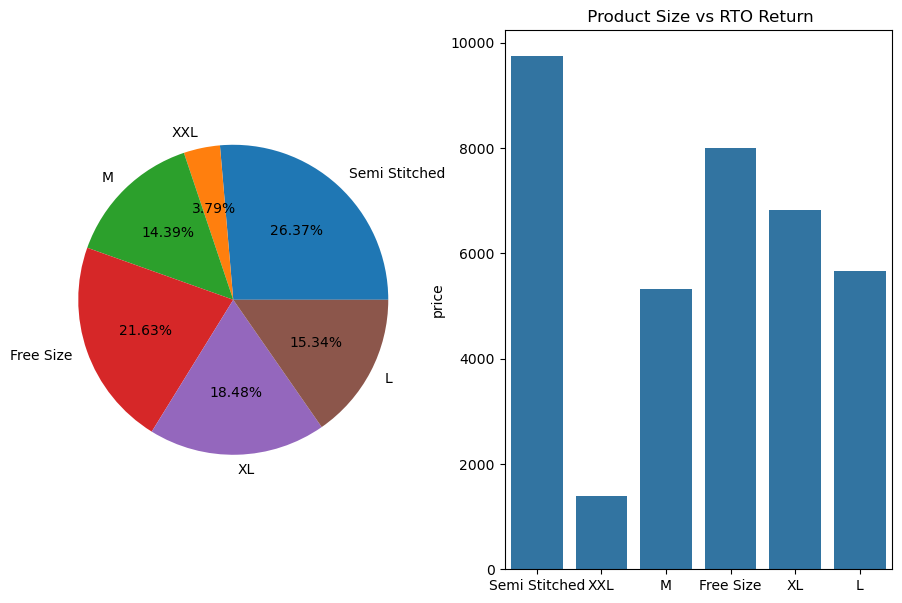

In [14]:
plt.figure(figsize=(11,7))
plt.subplot(1,2,1)
plt.pie(rto.groupby("size")["price"].sum(),autopct="%0.2f%%",labels=rto["size"].unique())
plt.subplot(1,2,2)
sns.barplot(y = rto.groupby("size")["price"].sum(),x = rto["size"].unique() )
plt.title(" Product Size vs RTO Return")
plt.show()


💡Q. Which Product has more return?

Ans. Semi Stitch, Free Size Product Have high Return

💡Q.Which product has low return?

Ans. XXL size Product has Less Return

#conclusion:-

XXL Prodcut High Demand
and seller focus on Semi Stitch & free size Product quality for increasing sale

In [15]:
deliverd = pd.DataFrame(data[data["status"]=="DELIVERED"])
deliverd

,status,id,date,state,name,sku,size,quantity,price
0,DELIVERED,406826346276_1,2022-08-01,Rajasthan,FIVESTAR Georgette Lehengha Choli with Inner C...,6326,Semi Stitched,1,1910.0
2,DELIVERED,184970118893_1,2022-08-02,Karnataka,PARTY WEAR BEAUTIFUL LOOK FANCY EMBROIDERY AN...,hk 1446,Free Size,1,1561.0
4,DELIVERED,528661643961_1,2022-08-02,West Bengal,stlish dress,mk -6114,XL,1,750.0
10,DELIVERED,322259568161_1,2022-08-03,Telangana,PARTY WEAR LOOK HEAVY EMBROIDERY AND 5mm SEQU...,hk 1408,Free Size,1,1350.0
11,DELIVERED,173534645547_1,2022-08-04,Madhya Pradesh,PARTY WEAR LOOK HEAVY EMBROIDERY AND 5mm SEQU...,hk 1408,Free Size,1,1350.0
...,...,...,...,...,...,...,...,...,...
196,DELIVERED,910483967612_1,2022-08-30,Assam,FIVE STAR Hair Straightener Comb for Women & M...,Uk8ndIGZ,Free Size,1,429.0
197,DELIVERED,355129275575_1,2022-08-30,India,Fancy look beautiful embroidery work kurti bot...,Hk 1454,XL,1,1368.0
198,DELIVERED,624159941368_1,2022-08-31,Odisha,Heavy Soft Butterfly Net With Rose Flower Patt...,Ad 021,XXL,1,1300.0
200,DELIVERED,507323371165_1,2022-08-31,Karnataka,FIVESTAR Bridal Wedding Gorgette Lehengha with...,6320,Semi Stitched,1,1949.0


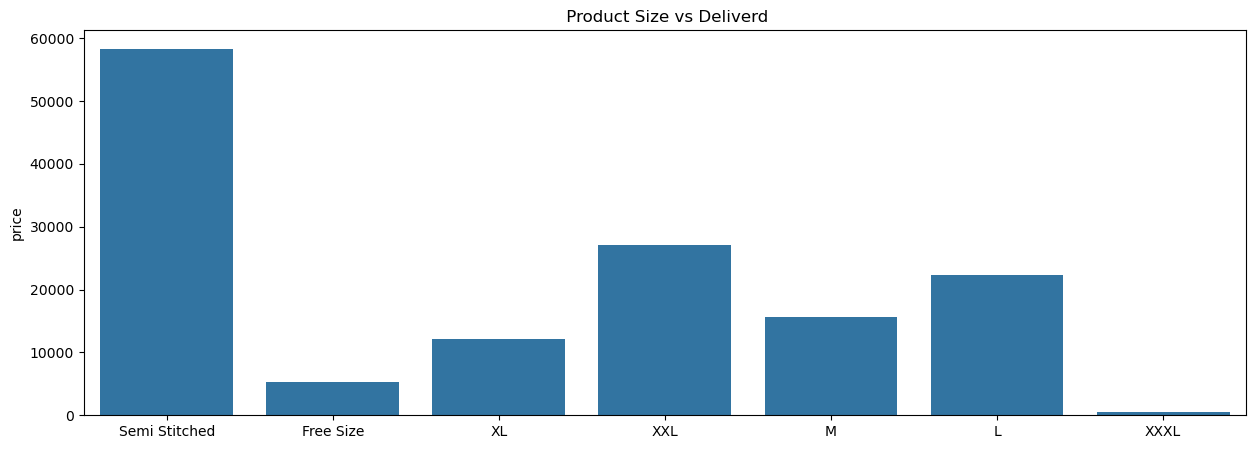

In [16]:
plt.figure(figsize=(15,5))
barplot = sns.barplot(y = deliverd.groupby("size")["price"].sum(),x = deliverd["size"].unique())
plt.title(" Product Size vs Deliverd")
plt.show()

💡 **Insight:** Groups data by categorical variables (like State or Product) to uncover top-performing segments or locations.

💡Q. Which product has highest or lowest sell?

Ans. Semi Stitched - product has more sell
 whereas XXXL Size Product has lowest sell means XXXL no demand

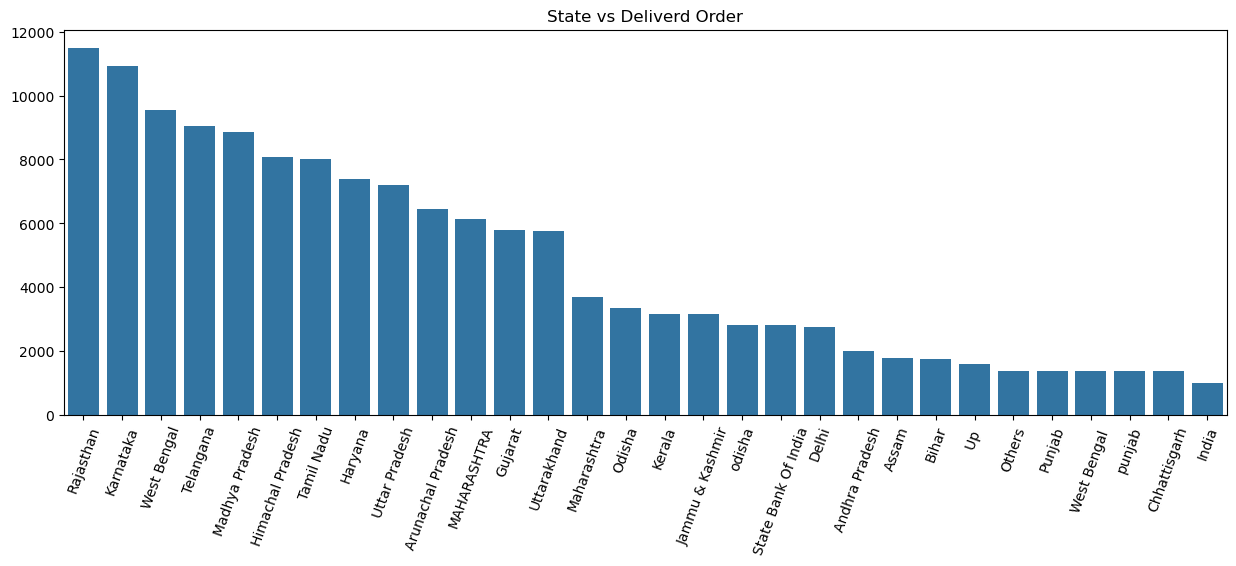

In [17]:
plt.figure(figsize=(15,5))
barplot = sns.barplot(y = sorted(deliverd.groupby("state")["price"].sum(),reverse=True),x = deliverd["state"].unique())
plt.title("State vs Deliverd Order")
plt.xticks(rotation=70)
plt.show()

💡 **Insight:** Groups data by categorical variables (like State or Product) to uncover top-performing  locations.

💡Q. Which state have more order?

Ans. Most of order recived from Rajasthan & karnataka.

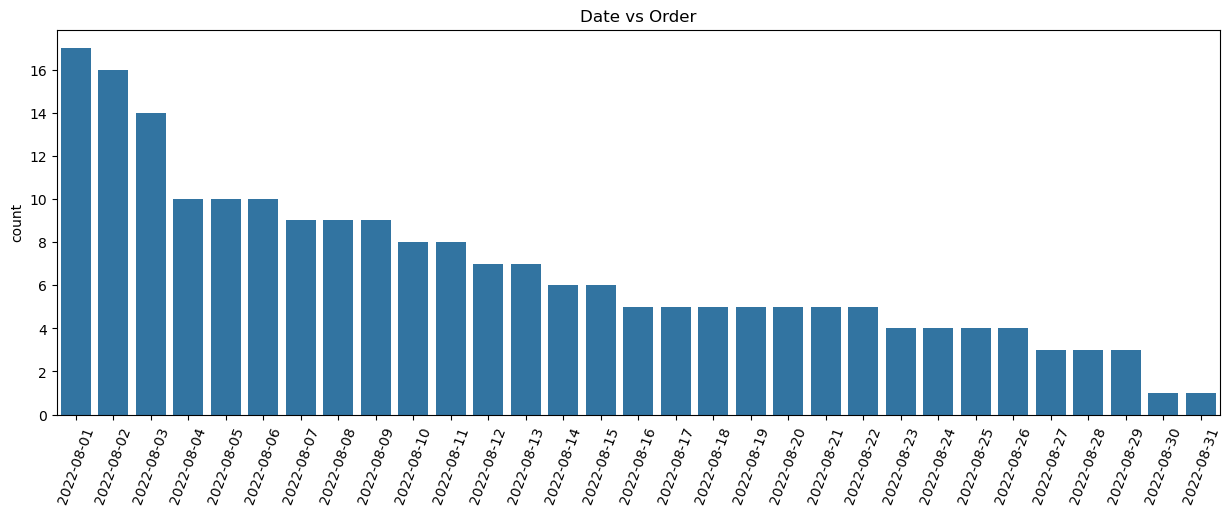

In [18]:
plt.figure(figsize=(15,5))
sns.barplot(x=data["date"].unique() ,y = data["date"].value_counts())
plt.title("Date vs Order")
plt.xticks(rotation=70)
plt.show()

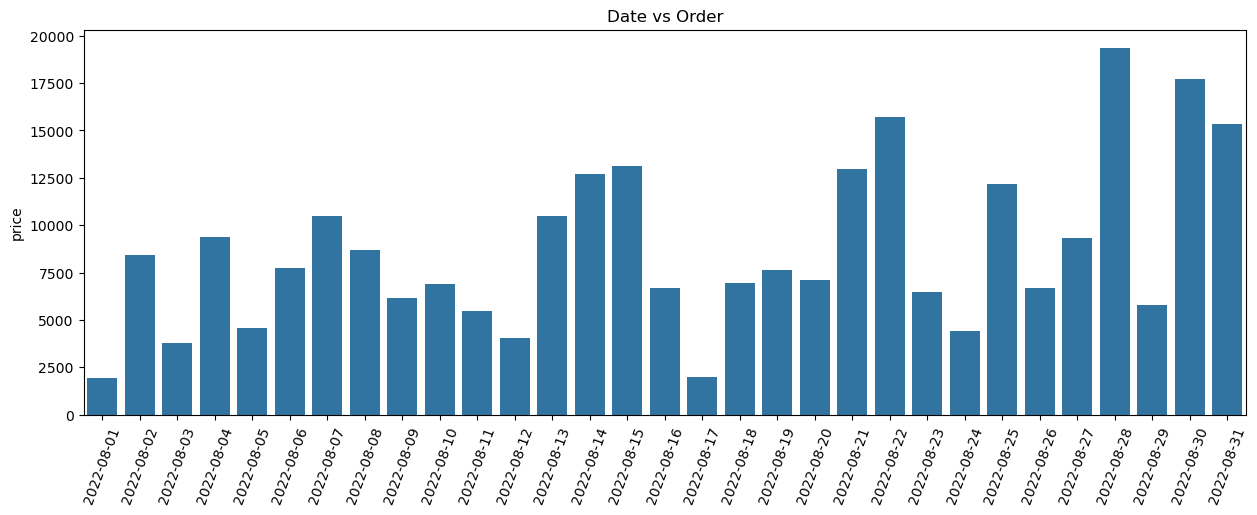

In [19]:
plt.figure(figsize=(15,5))
sns.barplot(x=data["date"].unique() ,y = data.groupby("date")["price"].sum())
plt.title("Date vs Order")
plt.xticks(rotation=70)
plt.show()

In [20]:
# Convert Data object to DateTime
# extract day from date

data["date"] = pd.to_datetime(data["date"])
deliverd["date"] = pd.to_datetime(deliverd["date"])
data["day_name"] = data["date"].dt.day_name()
data["day"] = data["date"].dt.day
deliverd["day_name"] = deliverd["date"].dt.day_name()
deliverd["day"] = deliverd["date"].dt.day

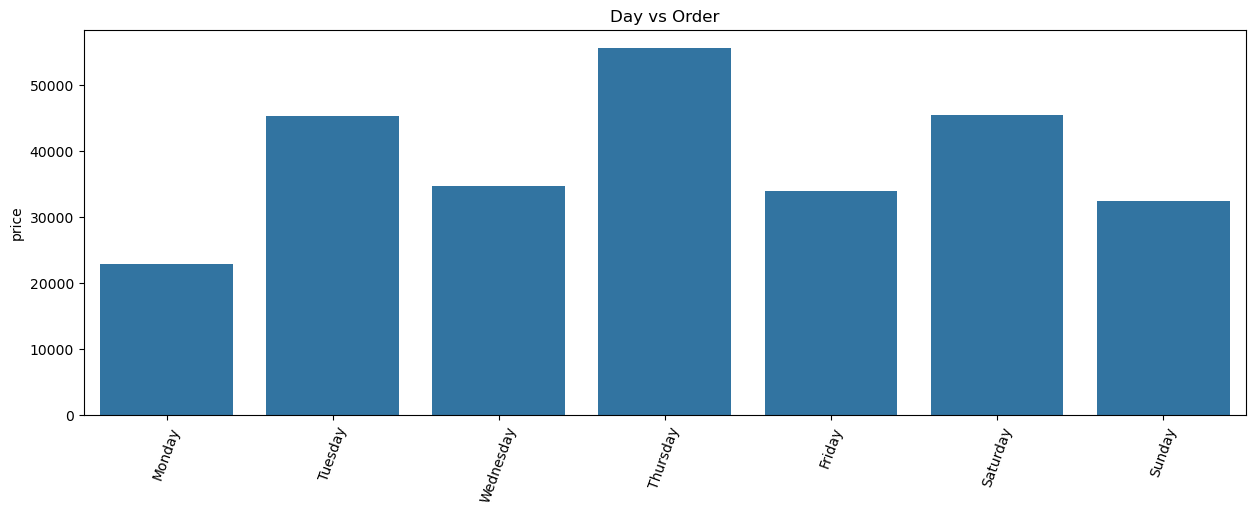

In [21]:
plt.figure(figsize=(15,5))
sns.barplot(x=data["day_name"].unique() ,y = data.groupby("day_name")["price"].sum())
plt.title("Day vs Order")
plt.xticks(rotation=70)
plt.show()

In [22]:
data.head(3)

,status,id,date,state,name,sku,size,quantity,price,day_name,day
0,DELIVERED,406826346276_1,2022-08-01,Rajasthan,FIVESTAR Georgette Lehengha Choli with Inner C...,6326,Semi Stitched,1,1910.0,Monday,1
1,CANCELLED,216649987717_1,2022-08-02,Andhra Pradesh,Beautiful pure lakhnovi long kurta embroidery ...,Kb 201,XXL,1,1500.0,Tuesday,2
2,DELIVERED,184970118893_1,2022-08-02,Karnataka,PARTY WEAR BEAUTIFUL LOOK FANCY EMBROIDERY AN...,hk 1446,Free Size,1,1561.0,Tuesday,2


Text(0.5, 1.0, 'Day vs Order Count')

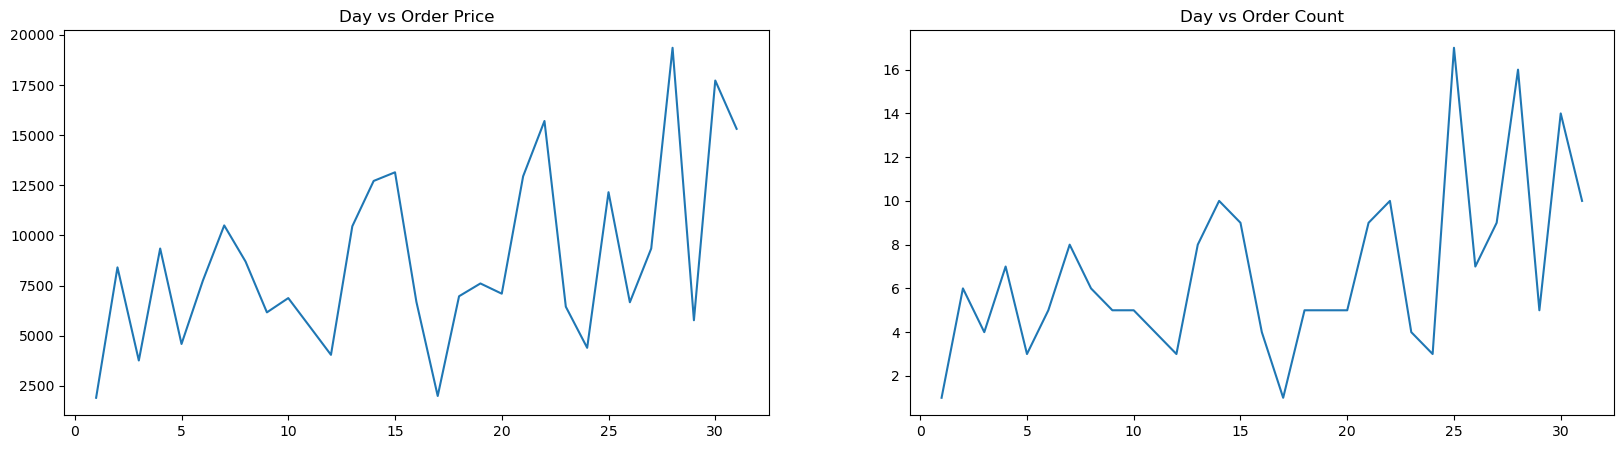

In [23]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(data["day"].unique(), data.groupby("day")["price"].sum())
plt.title("Day vs Order Price")
plt.subplot(1,2,2)
plt.plot(data["day"].unique(), data.groupby("day")["price"].count())
plt.title("Day vs Order Count")

In [24]:
pred_df = data.groupby("date")["price"].count().to_frame()
pred_df.reset_index(inplace=True)
pred_df.columns = ["ds","y"]
pred_df.head(3)

,ds,y
0,2022-08-01,1
1,2022-08-02,6
2,2022-08-03,4


Hence, we performed the analysis of data and EDA. Also, we got some insights which is beneficial for making informed business decision.